### Bivariate Analysis

Question: What was the relationship between Funding received and Funding requirements across by year?

Import Dependency

In [56]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [57]:
df = pd.read_csv("../data/2010-2024 Humanitarian Needs and Funding - Raw Data.csv")

In [58]:
df.head()

,Year,Plan,Crisis Country,Country Code,Metric,Value,Standardised Plan,Appeal Type,PiN Value for Dataviz,OUSG Metric
0,2010,Afghanistan,Afghanistan,AFG,People targeted,"7,800,000",Afghanistan,Consolidated Appeal Process (CAP),NaN,People in need
1,2010,Afghanistan,Afghanistan,AFG,Funding received,"223,824,925",Afghanistan,Consolidated Appeal Process (CAP),NaN,Funding received
2,2010,Afghanistan,Afghanistan,AFG,Funding requirements,"448,551,322",Afghanistan,Consolidated Appeal Process (CAP),NaN,Funding requirements
3,2010,Afghanistan,Afghanistan,AFG,People targeted,"5,400,000",Afghanistan,Consolidated Appeal Process (CAP),NaN,People in need
4,2010,Afghanistan,Afghanistan,AFG,Funding received,"345,246,607",Afghanistan,Consolidated Appeal Process (CAP),NaN,NaN


Covert "Value" column from string to numeric data, to ensure "Value" column only contains numeric data.

In [59]:
df['Value'] = df['Value'].replace(',', '', regex=True)
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

Filter Metric in Funding received and Funding requirements Since we only interest both Funding received and Funding requirements Metric.

In [60]:
df_filtered = df[df['Metric'].isin(['Funding received', 'Funding requirements'])]

Group and sum up the value of Funding received and Funding requirements value by years

In [61]:
yearly_funding = df_filtered.groupby(['Year', 'Metric'])['Value'].sum().reset_index()
pd.set_option('display.float_format', '{:,.0f}'.format)

Structure a new data farm object with columns 'year', 'Funding received', and 'Funding requirements'

In [62]:
yearly_received = yearly_funding[yearly_funding['Metric'] == 'Funding received'].rename(columns={'Value': 'Funding received'})
yearly_requirements = yearly_funding[yearly_funding['Metric'] == 'Funding requirements'].rename(columns={'Value': 'Funding requirements'})

yearly_merge = pd.merge(yearly_received, yearly_requirements, how='outer', on=['Year'])
yearly_merge.drop(columns=['Metric_x', 'Metric_y'], inplace=True)

yearly_merge

,Year,Funding received,Funding requirements
0,2010,"5,085,448,219",9607304247
1,2011,"1,443,996,575",4893040499
2,2012,"4,424,167,634",11263027389
3,2013,"4,712,463,654",10348530114
4,2014,"3,878,980,348",9923708780
5,2015,"8,550,240,023",14584807503
6,2016,"5,678,913,327",10327887945
7,2017,"9,111,000,599",19980547400
8,2018,"21,922,679,445",44655342517
9,2019,"25,355,421,122",57310206372


Drop off the NaN data from Funding received.

Reason: I think the NaN values are caused by missing data for the received funding. There should be a data anomaly; otherwise, it's very unlikely that the received funding is actually zero.

In [63]:
yearly_merge = yearly_merge.dropna(subset=['Funding received'])
yearly_merge

,Year,Funding received,Funding requirements
0,2010,"5,085,448,219",9607304247
1,2011,"1,443,996,575",4893040499
2,2012,"4,424,167,634",11263027389
3,2013,"4,712,463,654",10348530114
4,2014,"3,878,980,348",9923708780
5,2015,"8,550,240,023",14584807503
6,2016,"5,678,913,327",10327887945
7,2017,"9,111,000,599",19980547400
8,2018,"21,922,679,445",44655342517
9,2019,"25,355,421,122",57310206372


Generate scatter plot between Funding received and Funding requirements

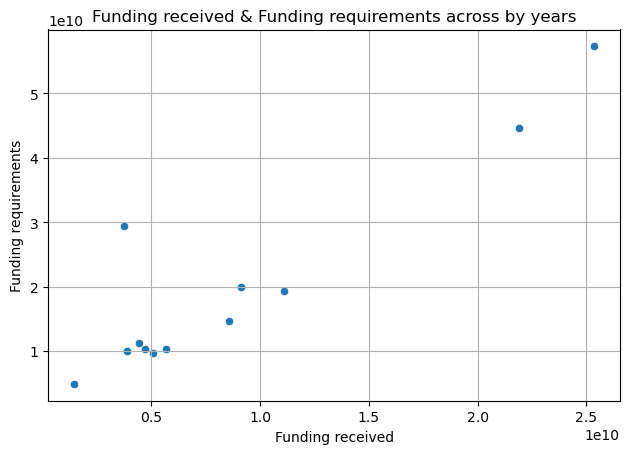

In [64]:
sns.scatterplot(data = yearly_merge, x = yearly_merge['Funding received'], y = yearly_merge['Funding requirements'])
plt.xlabel('Funding received')
plt.ylabel('Funding requirements')
plt.title('Funding received & Funding requirements across by years')
plt.grid(True)
plt.tight_layout()
plt.show()

Find the correlation coefficient between Funding received and Funding requirements

In [65]:
print(
    'The correlation coefficient:', 
    yearly_merge['Funding received'].corr(yearly_merge['Funding requirements'], method='pearson')
)

The correlation coefficient: 0.911077741301193


### Analyze: 

The scatter plot reveals a strong linear relationship between funding requirements and funding received across years. As funding needs increase, the received funding tends to rise proportionally. This is supported by a Pearson correlation coefficient of approximately 0.911078, indicating a very strong positive correlation. Therefore, we can conclude that there is a consistently strong relationship between the level of funding requirements and the funding provided over time.

<hr>

### NOTE!!!!
However, this relationship analysis is biased because of the lack of received funding data from 2022 to 2024, which causes data anomalies and thus results in biased outcomes.
